#### PAIR PROGRAMMING - REGRESIÓN LOGÍSTICA - PREPROCESADO

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import sidetable


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


Cuando nos enfrentamos a problemas de regresión lineal vimos que eran necesarios algunos cambios antes de poder ajustar los modelos. En el caso de la regresión logística lo tendremos que hacer. Estos cambios incluyen:
- Estandarización de las variables predictoras numéricas
- Codificación de las variables categóricas
- Balanceo de la variable respuesta

In [2]:
df = pd.read_pickle('datos/df_eda.pkl')

In [3]:
pd.options.display.max_columns= None

In [4]:
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,3,0,2,2,3,4,4,4,2,3,2,310
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,3,2,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,3,3,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,3,4,3,4,2,2,0,2,4,2,5,0


- Estandarización de las variables predictoras numéricas

In [5]:
# Como hemos decidido no tratar los outliers durante el EDA, ahora vamos a usar el método RobustScaler para la estandarización 
# de las variables numéricas

df_num = df.select_dtypes(include = np.number)
df_num.head()

,age,flight_distance,departure_delay_in_minutes
0,65,265,0
1,47,2464,310
2,15,2138,0
3,60,623,0
4,70,354,0


In [6]:
# construimos el modelo de escalador
robust = RobustScaler()

In [7]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(df_num)

RobustScaler()

In [8]:
# transformamos los datos
X_robust = robust.transform(df_num)

In [9]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(X_robust, columns = df_num.columns)
numericas_robust.head(2)

,age,flight_distance,departure_delay_in_minutes
0,1.041667,-1.400844,0.000000
1,0.291667,0.454852,25.833333


In [10]:
df_num.shape

(129880, 3)

In [11]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna age es:  -0.023835142695821786
La desviación estándar de la columna age es: 0.6299733312654873
-------------------------------------------------------------
La media de la columna flight_distance es:  0.0476025776471368
La desviación estándar de la columna flight_distance es: 0.8667642241463258
-------------------------------------------------------------
La media de la columna departure_delay_in_minutes es:  1.2261427214865006
La desviación estándar de la columna departure_delay_in_minutes es: 3.172593851253044
-------------------------------------------------------------


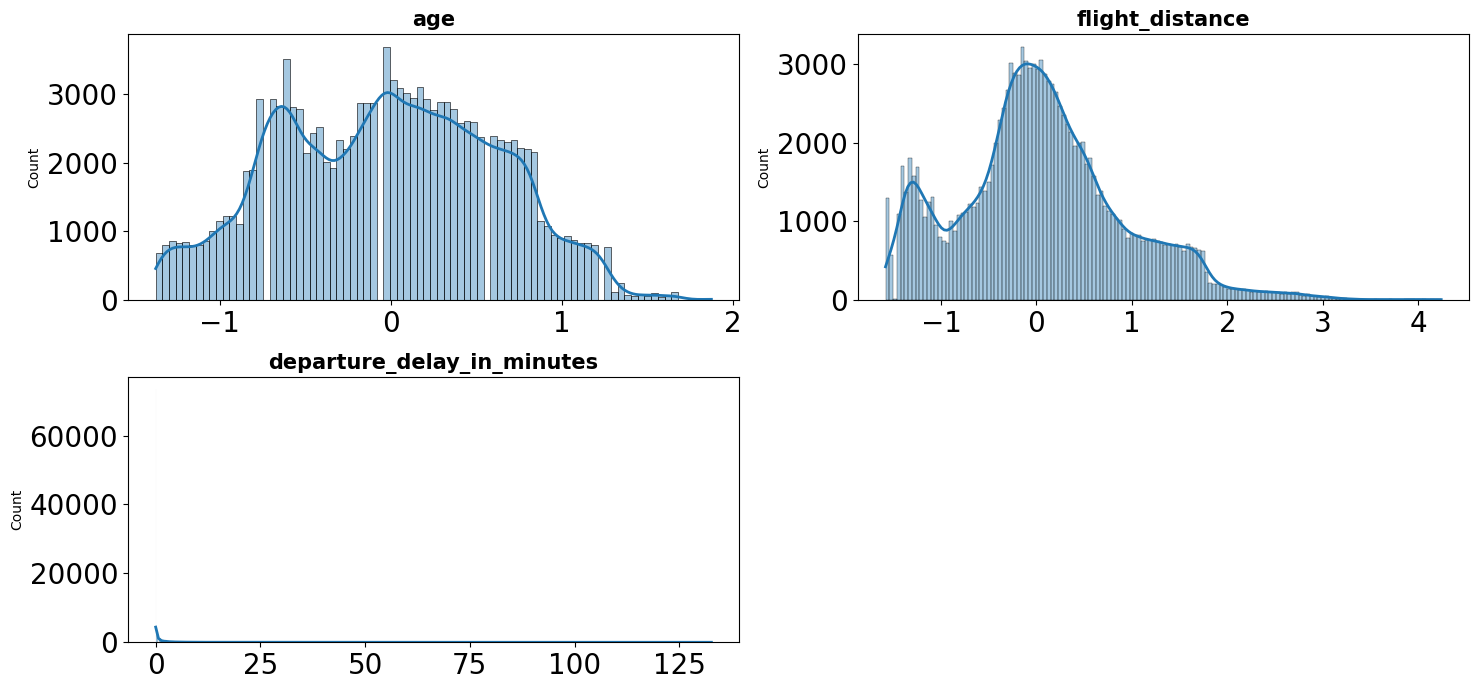

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 7))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.4, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

fig.delaxes(axes[-1])
# fig.delaxes(axes[-2])
# fig.delaxes(axes[-3])

In [13]:
# vamos a guardar este dataframe 

df[numericas_robust.columns] = numericas_robust
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,1.041667,Personal Travel,Eco,-1.400844,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000
1,satisfied,Male,Loyal Customer,0.291667,Personal Travel,Business,0.454852,0,0,3,0,2,2,3,4,4,4,2,3,2,25.833333
2,satisfied,Female,Loyal Customer,-1.041667,Personal Travel,Eco,0.179747,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000
3,satisfied,Female,Loyal Customer,0.833333,Personal Travel,Eco,-1.098734,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000
4,satisfied,Female,Loyal Customer,1.250000,Personal Travel,Eco,-1.325738,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000


In [14]:
df.isnull().sum()

satisfaction                         0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
seat_comfort                         0
departure/arrival_time_convenient    0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay_in_minutes           0
dtype: int64

- Codificación de las variables categóricas

In [15]:
df_cat = df.select_dtypes(exclude = np.number)
df_cat.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,2,2,4,2,3,3,0,3,5,3,2
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,3,0,2,2,3,4,4,4,2,3,2
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,2,0,2,2,3,3,4,4,4,2
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,3,4,3,1,1,0,1,4,1,3
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,4,3,4,2,2,0,2,4,2,5


In [16]:
df['class'].unique()

['Eco', 'Business', 'Eco Plus']
Categories (3, object): ['Business', 'Eco', 'Eco Plus']

In [17]:
df_codificadas = df[['gender', 'customer_type', 'type_of_travel', 'class']]
df_codificadas.head()

,gender,customer_type,type_of_travel,class
0,Female,Loyal Customer,Personal Travel,Eco
1,Male,Loyal Customer,Personal Travel,Business
2,Female,Loyal Customer,Personal Travel,Eco
3,Female,Loyal Customer,Personal Travel,Eco
4,Female,Loyal Customer,Personal Travel,Eco


- Variables a codificar : gender, customer_type, type_of_travel y class
* El resto ya se encontraban codificadas de antemano (eran numéricas pero categóricas encubiertas)

VARIABLES A CODIFICAR - DETERMINAR ORDEN:

- gender : es categórica de tipo binario, que tiene orden.
- customer_type: es de tipo binario también y, por tanto, tiene orden
- type_of_travel: de tipo binario; tiene orden
- class: 


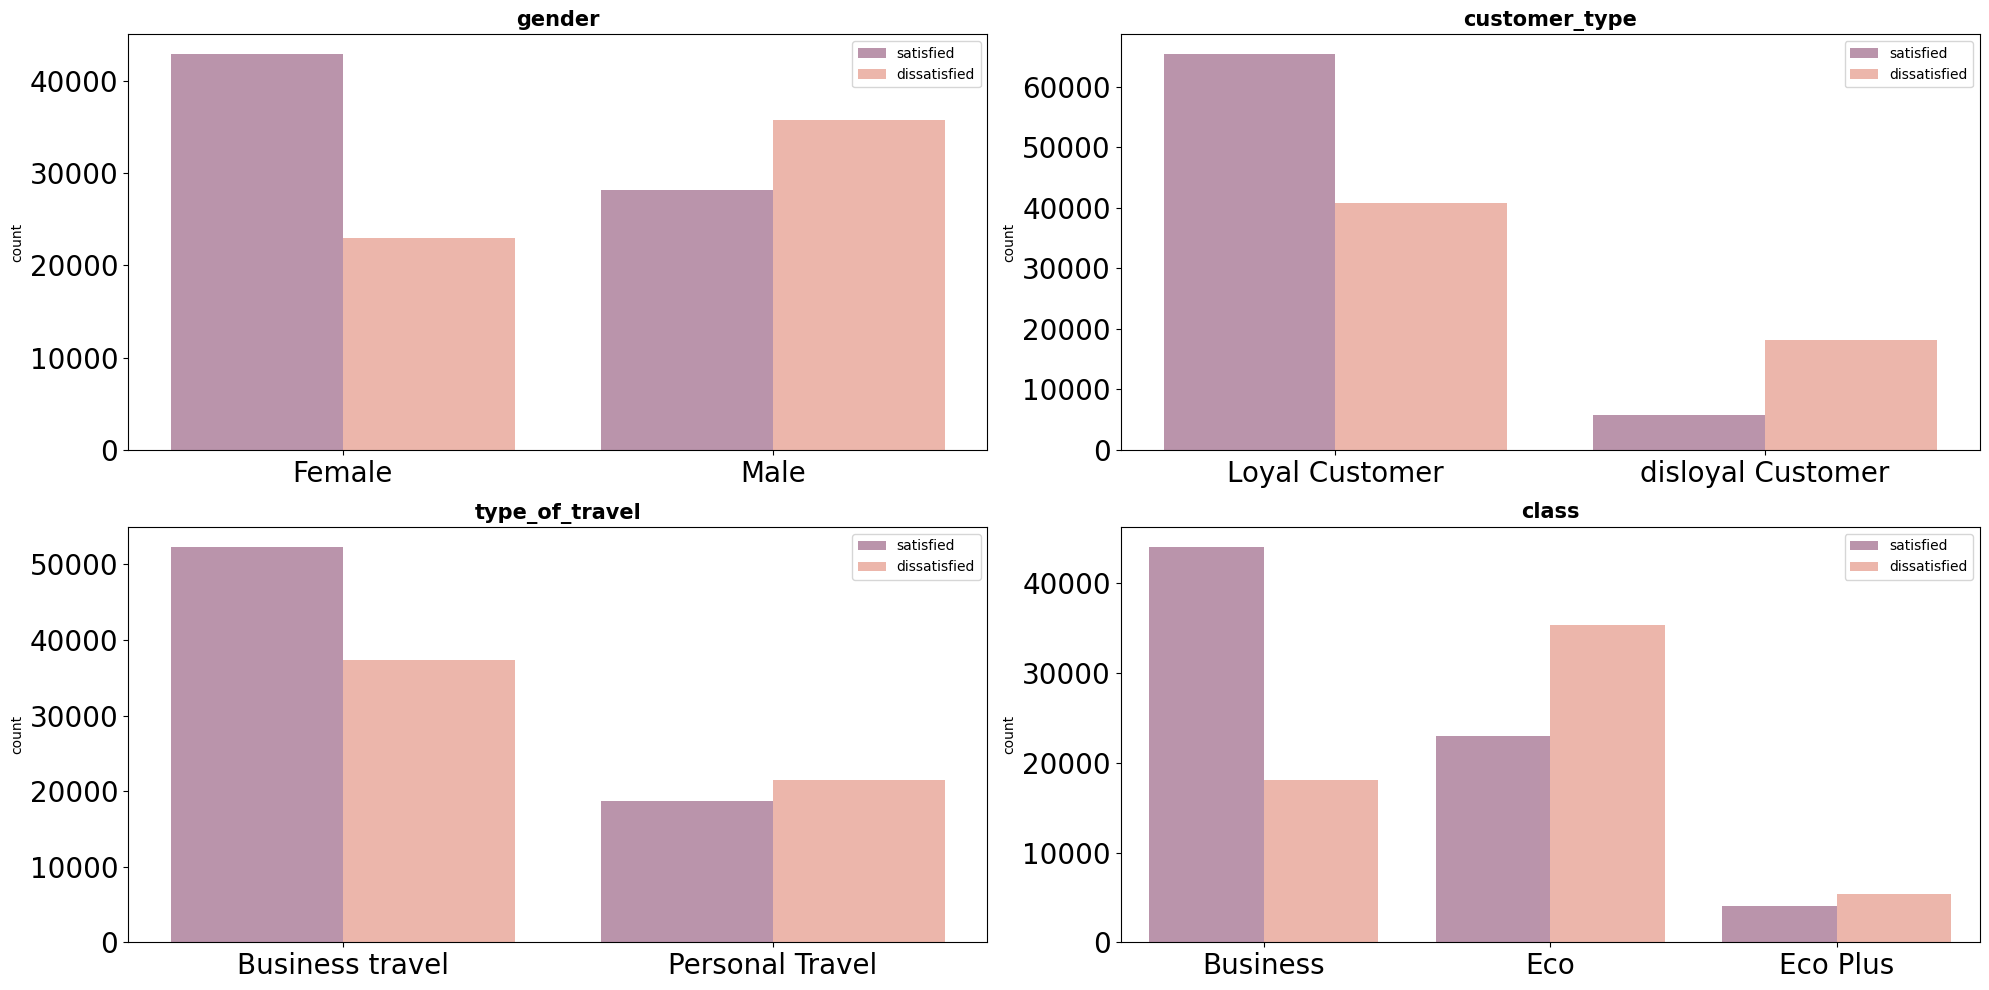

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

axes = axes.flat

for i, colum in enumerate(df_codificadas.columns): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction",
        palette = 'rocket',
        alpha = 0.5, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")
    
fig.tight_layout();

### GENDER

In [19]:
df.stb.freq(['gender', 'satisfaction'])

,gender,satisfaction,count,percent,cumulative_count,cumulative_percent
0,Female,satisfied,42928,33.052048,42928,33.052048
1,Male,dissatisfied,35822,27.580844,78750,60.632892
2,Male,satisfied,28159,21.680782,106909,82.313674
3,Female,dissatisfied,22971,17.686326,129880,100.000000


In [20]:
mapa_gender = {'Male':0, 'Female':1}

In [21]:
df['gender'] = df['gender'].map(mapa_gender)

### CUSTOMER TYPE

In [22]:
df.stb.freq(['customer_type', 'satisfaction'])

,customer_type,satisfaction,count,percent,cumulative_count,cumulative_percent
0,Loyal Customer,satisfied,65387,50.344164,65387,50.344164
1,Loyal Customer,dissatisfied,40713,31.346628,106100,81.690791
2,disloyal Customer,dissatisfied,18080,13.920542,124180,95.611334
3,disloyal Customer,satisfied,5700,4.388666,129880,100.000000


In [23]:
mapa_customer = {'Loyal Customer':1, 'disloyal Customer':0}

In [24]:
df['customer_type'] = df['customer_type'].map(mapa_customer)

TYPE OF TRAVEL

In [25]:
df.stb.freq(['type_of_travel', 'satisfaction'])

,type_of_travel,satisfaction,count,percent,cumulative_count,cumulative_percent
0,Business travel,satisfied,52356,40.311056,52356,40.311056
1,Business travel,dissatisfied,37337,28.747305,89693,69.058362
2,Personal Travel,dissatisfied,21456,16.519864,111149,85.578226
3,Personal Travel,satisfied,18731,14.421774,129880,100.000000


In [29]:
mapa_travel = {'Business travel':1, 'Personal Travel':0}

In [30]:
df['type_of_travel'] = df['type_of_travel'].map(mapa_travel)

CLASS

In [26]:
df.stb.freq(['class', 'satisfaction'])

,class,satisfaction,count,percent,cumulative_count,cumulative_percent
0,Business,satisfied,44095,33.950570,44095,33.950570
1,Eco,dissatisfied,35336,27.206652,79431,61.157222
2,Eco,satisfied,22973,17.687866,102404,78.845088
3,Business,dissatisfied,18065,13.908993,120469,92.754081
4,Eco Plus,dissatisfied,5392,4.151524,125861,96.905605
5,Eco Plus,satisfied,4019,3.094395,129880,100.000000


In [31]:
mapa_class = {'Eco Plus':0, 'Eco':1, 'Business': 2}

In [32]:
df['class'] = df['class'].map(mapa_class)

- CODIFICACIÓN DE VR 'SATISFACTION'

In [35]:
df.stb.freq(['satisfaction'])

,satisfaction,count,percent,cumulative_count,cumulative_percent
0,satisfied,71087,54.73283,71087,54.73283
1,dissatisfied,58793,45.26717,129880,100.00000


In [34]:
mapa_satis = {'satisfied':1, 'dissatisfied':0}

In [36]:
df['satisfaction'] = df['satisfaction'].map(mapa_satis)

In [37]:
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,1,1,1,1.041667,0,1,-1.400844,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000
1,1,0,1,0.291667,0,2,0.454852,0,0,3,0,2,2,3,4,4,4,2,3,2,25.833333
2,1,1,1,-1.041667,0,1,0.179747,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000
3,1,1,1,0.833333,0,1,-1.098734,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000
4,1,1,1,1.250000,0,1,-1.325738,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000


- BALANCEO DE VR SATISFACTION ???

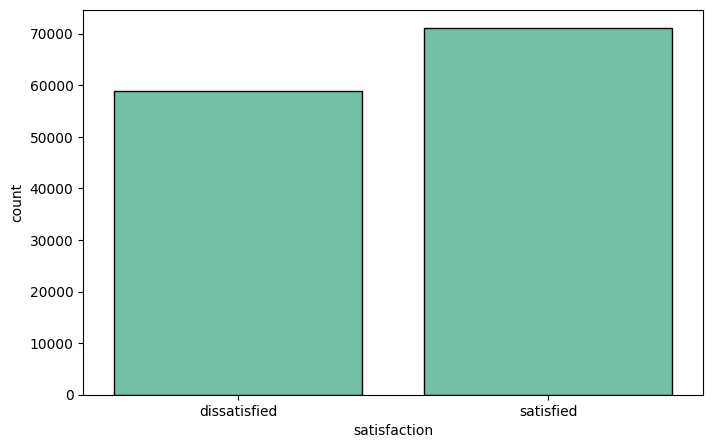

In [39]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "satisfaction",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["dissatisfied", "satisfied"]) 
plt.show();